In [1]:
# 1. Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 2. Chargement du dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)


In [3]:
# 3. Aperçu
print(df.head())
print(df.info())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

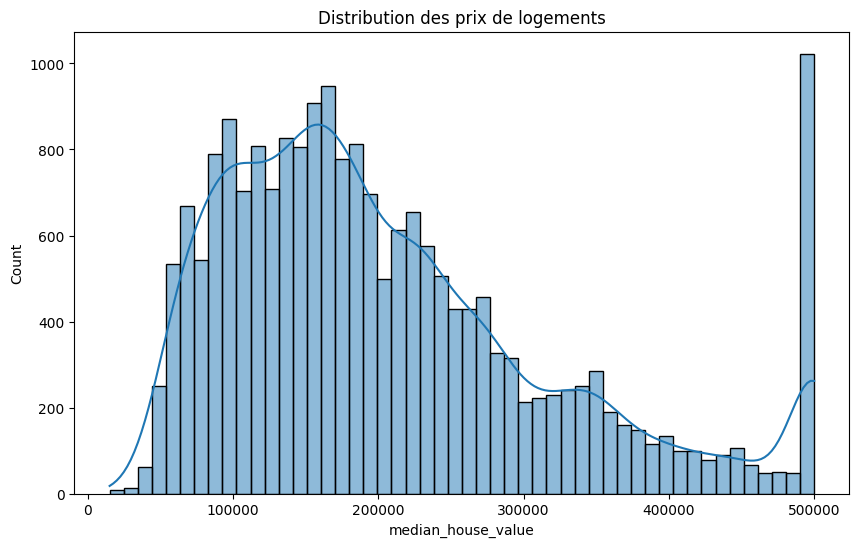

In [4]:
# 4. Nettoyage simple (remplacement des valeurs manquantes)
df = df.dropna()

# 5. Visualisation
plt.figure(figsize=(10, 6))
sns.histplot(df["median_house_value"], bins=50, kde=True)
plt.title("Distribution des prix de logements")
plt.show()

In [5]:
# 6. Préparation des données
X = df[["median_income", "housing_median_age", "total_rooms", "total_bedrooms"]]
y = df["median_house_value"]

# 7. Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

RMSE: 78629.70245443656
R²: 0.5478940860232946


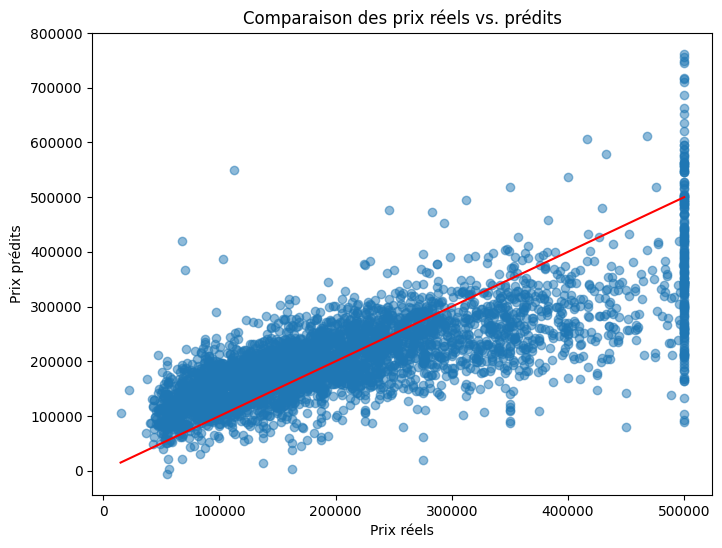

In [6]:
# 9. Prédictions et évaluation
y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

# 10. Visualisation des prédictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Prix réels")
plt.ylabel("Prix prédits")
plt.title("Comparaison des prix réels vs. prédits")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.show()